In [73]:
import pandas as pd

df = pd.read_csv("ab_test_data.csv")
df

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0
...,...,...,...,...
19993,6763ae9a-515c-473e-af00-0d9c4f6a5bc7,2023-07-06 03:27:37.041104,b,0
19994,ac5600f2-4d16-4503-b115-f1a96728b6d1,2023-07-03 04:20:48.572143,a,0
19995,5a8b2630-209b-4d83-b47f-0f3d9dd568a8,2023-07-23 16:23:49.211910,b,1
19996,b572d68b-26ac-432b-9f88-83e0fdee4ca1,2023-07-03 18:26:20.880675,b,0


In [74]:
df['test_group'].value_counts()

,count
test_group,
a,10013
b,9985


In [75]:
print("Кількість користувачів групи 'a':", (df['test_group'] == 'a').sum())
print("Кількість користувачів групи 'b':", (df['test_group'] == 'b').sum())

Кількість користувачів групи 'a': 10013
Кількість користувачів групи 'b': 9985


In [76]:
df['conversion'].value_counts()

,count
conversion,
0,18498
1,1500


In [77]:
print("Конверсія в групі A:", round(df[df['test_group'] == 'a']['conversion'].mean() * 100, 2), "%")
print("Конверсія в групі B:", round(df[df['test_group'] == 'b']['conversion'].mean() * 100, 2), "%")


Конверсія в групі A: 6.1 %
Конверсія в групі B: 8.9 %


In [78]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
start_date = df['timestamp'].min()
end_date = df['timestamp'].max()
diff_date = (end_date - start_date).days

print("Дата початку тесту:", start_date.date())
print("Дата кінця тесту:", end_date.date())
print("Тривалість тесту (в днях):", diff_date)

Дата початку тесту: 2023-07-03
Дата кінця тесту: 2023-07-25
Тривалість тесту (в днях): 21


Тестування гіпотез за допомогою SciPy

Критерій Стʼюдента

In [79]:
from scipy import stats

alpha = 0.05

statistic, pvalue = stats.ttest_ind(df[df['test_group'] == 'a']['conversion'],
                                    df[df['test_group'] == 'b']['conversion'],
                                    alternative='less')

print(f't-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')

if pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected.')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected.')


t-statistic: -7.53, p-value: 0.0
The difference is statistically significant, Null Hypothesis is rejected.


Візуалізація для порівняння середніх значень у групах з 95% довірчими інтервалами

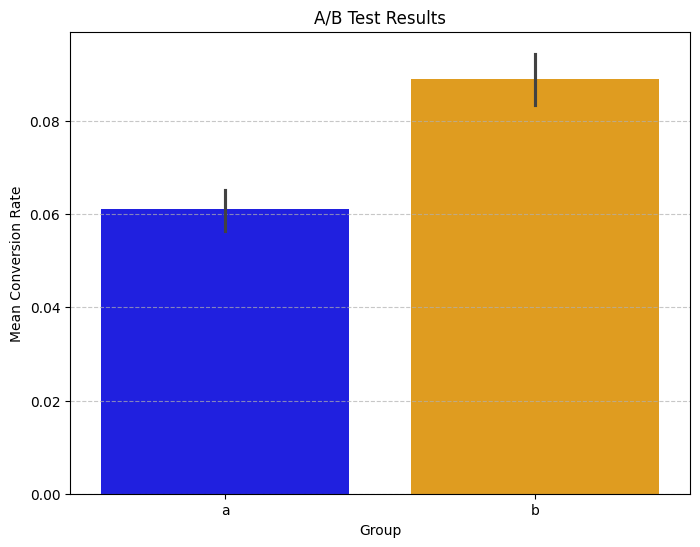

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=df['test_group'],
            y=df['conversion'],
            errorbar=('ci', 95),
            hue=df['test_group'],
            palette=['blue', 'orange'])

plt.title('A/B Test Results')
plt.xlabel('Group')
plt.ylabel('Mean Conversion Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()